# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [113]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
import statsmodels
import seaborn as sns
sns.set()

In [114]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [115]:
pd.options.mode.chained_assignment = None  # default='warn'

# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

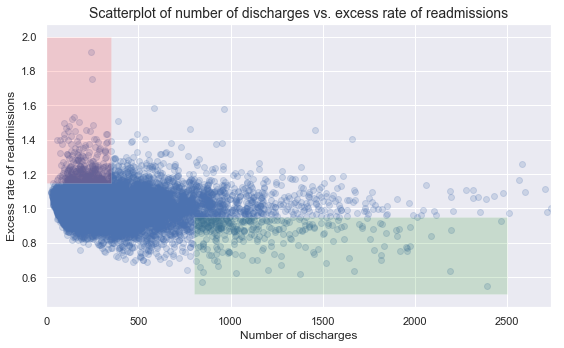

In [116]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [117]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [118]:
clean_hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


# Data Exploration
What's the relationship between Number of Discharges and Excess Readmission Ratio


In [119]:
from scipy.stats import pearsonr
pearsonr(x,y)

(-0.09309554287590441, 1.5022756426464526e-23)

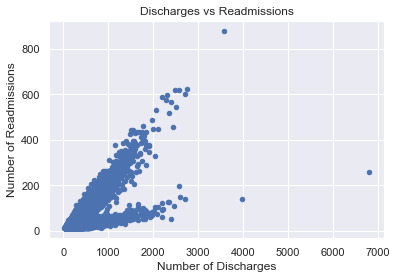

In [120]:
clean_hospital_read_df[['Number of Discharges','Number of Readmissions']].plot.scatter(x='Number of Discharges', y='Number of Readmissions', title='Discharges vs Readmissions')
plt.show()

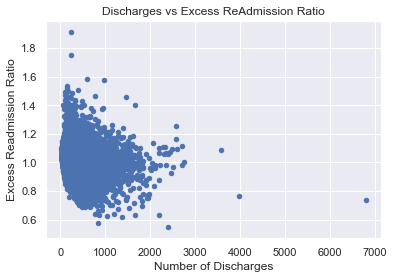

In [121]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].plot.scatter(x='Number of Discharges', y='Excess Readmission Ratio', title='Discharges vs Excess ReAdmission Ratio')
plt.show()

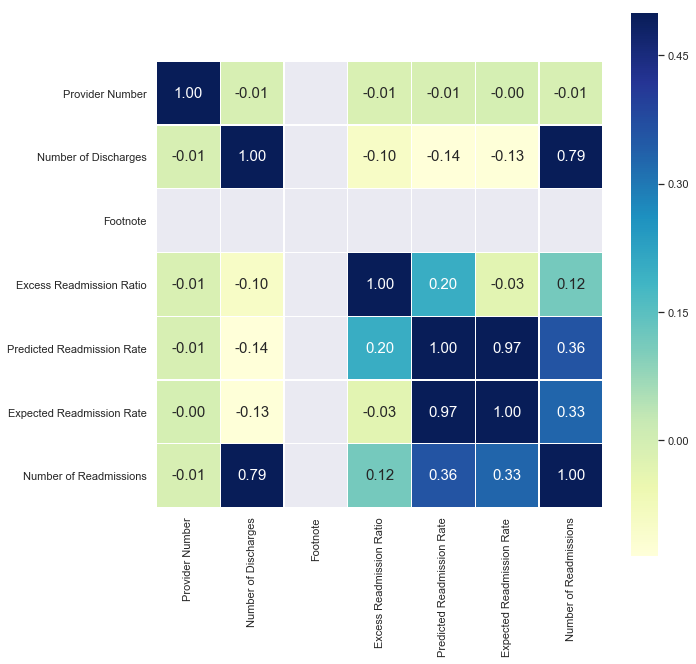

In [122]:
# A Col
corr_matrix = clean_hospital_read_df.corr()
plt.figure(figsize=(10,10)) #this sets the size of the heatmap
sns.heatmap(corr_matrix, linewidths=0.2, square=True, vmax = 0.5, cmap="YlGnBu",annot=True,fmt='.2f', annot_kws={'size': 15})
plt.show()

# Conclusion for A
* The Pearson correlation coefficient is -0.093 which is very close to 0. This shows that the Number of Discharges is not correlated to Excess Readmission Ratio.

* Based on the correlation matrix, the initial observation seems to be correct, the Number of Discharges is highly correlated to the Number of Readmissions. 

# Hypothesis Testing

$H_0$: number of discharges has no influence on the readmission ratio


$H_a$: number of discharges influences the readmission ratio

In [108]:
# Create a new data frame where Excess Readmission Ratio null values are removed
df = clean_hospital_read_df[pd.notnull(clean_hospital_read_df["Excess Readmission Ratio"])]
df.shape

(11497, 12)

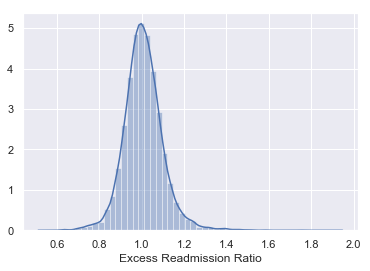

In [130]:
# Check if the variables are normally distributed
sns.distplot(df['Excess Readmission Ratio'])
plt.show()

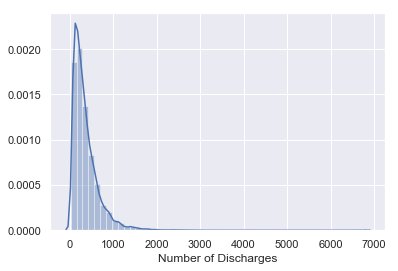

In [129]:
sns.distplot(df['Number of Discharges'])
plt.show()

The Number of Discharges is not normally distrbuted. We will use log to transform it.

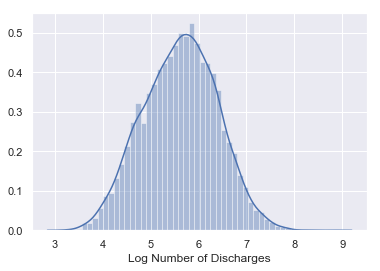

In [126]:
df['Log Number of Discharges'] = np.log(df['Number of Discharges'])
sns.distplot(df['Log Number of Discharges'])
plt.show()


In [132]:
pearsonr(df['Log Number of Discharges'], df['Excess Readmission Ratio'])

(-0.09766978480467148, 8.962784605028911e-26)

## Conclusion
There is a very weak negative correlation (-0.09766978480467148) between Number of Discharges and Excess Readmission Ratio. The p-value of almost close to 0 (8.962784605028911e-26). With p-value < $\alpha$ (1%), we can *reject* the $H_0$: number of discharges has no influence on the readmission ratio.

In [149]:
stats.linregress(df['Log Number of Discharges'], df["Excess Readmission Ratio"])

LinregressResult(slope=-0.01171431266578428, intercept=1.0732691866644413, rvalue=-0.09766978480467146, pvalue=8.962784604972498e-26, stderr=0.0011133217610828237)

If we want a 99% confidence interval and use a z distribution, the z score is 2.8.

In [146]:
slope = -0.01171431266578428
intercept = 1.0732691866644413
stderr = 0.0011133217610828237
confint1 = slope - (2.8 * stderr)
confint2 = slope + (2.8 * stderr)

In [147]:
print("99% confidence interval is from : " + str(confint1) + " to " + str(confint2))

99% confidence interval is from : -0.014831613596816185 to -0.008597011734752373


The confidence interval only has negative values. This confirms that there is a negative correlation between Number of Discharges and Excess Readmission Ratio.

However, it's a very weak correlation. Looking at the scatter plot below, we can also see that the correlation is partically not significant. Hence we can conclude that it's statistically significance but practically not significant due to the weak correlation.

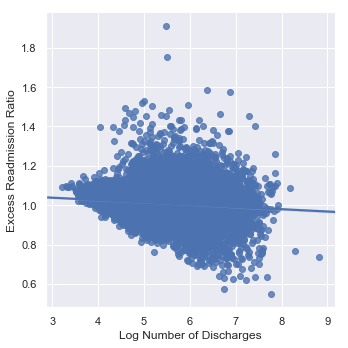

In [175]:
#sns.lmplot(x='Log Number of Discharges', y='Excess Readmission Ratio', data=df)
sns.lmplot(x='Log Number of Discharges', y='Excess Readmission Ratio', data=df)
plt.show()

# Do We Agree With The Recommendations?
The original analysis recommends that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. 

**Analysis**
+ Our analysis will look at if there's significant difference between the re-admission rates for the 2 groups:
* (i) Group with small capacity (<300)
* (ii) Group with large capacity (>= 300)



In [176]:
# Create 2 dataframes with these 2 groups
df_small = df[df['Number of Discharges'] < 300]
df_large = df[df['Number of Discharges'] >= 300]

In [178]:
# Calculate their means
mean_small = np.mean(df_small['Excess Readmission Ratio'])
mean_large = np.mean(df_large['Excess Readmission Ratio'])
print("Means of Excess Re-Admission Ratio for Small and Large groups are: ", mean_small, mean_large)

Means of Excess Re-Admission Ratio for Small and Large groups are:  1.0142382121807445 0.9998708480237513


In [180]:
# Calculate difference in means
mean_difference = df_small - df_large

## Hypothesis Testing
$H_0$: There is no difference between the means


$H_a$: There is a difference between the means

In [182]:
# Calculate the standard deviation
stddev_small = np.std(df_small['Excess Readmission Ratio'])
stddev_large = np.std(df_large['Excess Readmission Ratio'])

print("Standard deviation for Small and Large groups are: ", stddev_small, stddev_large)

Standard deviation for Small and Large groups are:  0.08247145651495595 0.1011088761383622


Since we do not know the population standard deviation, we will use the above sample standard deviations as the popoulation SD provided the sample size is big enough. Let's check the sample size for both dataframes.

In [183]:
print("Sample size for Small and Large groups are: ", len(df_small), len(df_large))

Sample size for Small and Large groups are:  6108 5389


The sample sizes for each group is large. We'll use the standard deviations for both groups as our population standard deviations. Let's calculate the standard error for both groups.

In [185]:
stderr_small = stddev_small/np.sqrt(len(df_small))
stderr_large = stddev_large/np.sqrt(len(df_large))
print("Standard errors for Small and Large groups are: ", stderr_small, stderr_large)

Standard errors for Small and Large groups are:  0.0010552470590102657 0.001377321069953862


In [198]:
stats.ttest_ind(df_small['Excess Readmission Ratio'], df_large['Excess Readmission Ratio'], equal_var=False)

Ttest_indResult(statistic=8.279706368011247, pvalue=1.3862099593114599e-16)

## Conclusion
Based on the Ttest calculation above, the T-statistic is way greater than the critical value, we reject the null hypothesis, in favor of the alternate hypothesis as there is a significant difference between the 2 groups. So the recommendation is correct.